In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
! pip install imbalanced-learn

In [3]:
en_dataset = pd.read_csv('clean_data/StrokeDataEncoded.csv')
en_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,61.0,0,0,1,3,0,202.21,29.035926,2,1
1,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
2,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
3,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
4,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5028,0,80.0,1,0,1,2,1,83.75,29.035926,2,0
5029,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5030,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5031,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [4]:
from imblearn.over_sampling import SMOTE
#Define indpendent and dependent variables - and remove the variable to be predicted 
X = en_dataset.drop('stroke', axis=1)
y = en_dataset['stroke']
smote = SMOTE()
X,y = smote.fit_resample(X,y)

In [5]:
print(X.shape)
print(y.shape)

(9674, 10)
(9674,)


In [6]:
smote_dataset = pd.concat([X,y], axis=1)

In [7]:
smote_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,61.0,0,0,1,3,0,202.21,29.035926,2,1
1,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
2,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
3,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
4,0,69.0,0,0,0,2,1,94.39,22.800000,2,1


In [8]:
X = smote_dataset.drop('stroke', axis=1)
y = smote_dataset['stroke']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7739, 10)
(1935, 10)
(7739,)
(1935,)


In [10]:
#The data should be scaled due to the large variance amongst numerical features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [11]:
#train the model on train set
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

#print prediction results
predictions = knn_model.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       978
           1       0.86      0.96      0.91       957

    accuracy                           0.90      1935
   macro avg       0.91      0.90      0.90      1935
weighted avg       0.91      0.90      0.90      1935



In [13]:
print(f'Training Score: {knn_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn_model.score(X_test_scaled, y_test)}')

Training Score: 0.9253133479777749
Testing Score: 0.9023255813953488


k: 1, Train/Test Score: 1.000/0.930
k: 3, Train/Test Score: 0.946/0.913
k: 5, Train/Test Score: 0.925/0.902
k: 7, Train/Test Score: 0.913/0.898
k: 9, Train/Test Score: 0.901/0.888
k: 11, Train/Test Score: 0.893/0.880
k: 13, Train/Test Score: 0.885/0.873
k: 15, Train/Test Score: 0.876/0.870
k: 17, Train/Test Score: 0.872/0.869
k: 19, Train/Test Score: 0.869/0.865


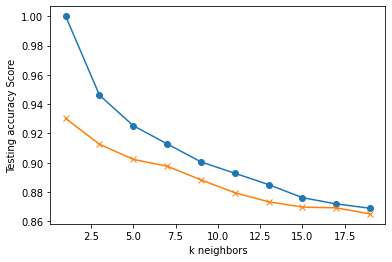

In [14]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

Test Acc: 0.913


## GridSearch Parameters

In [18]:
# defining parameter range
param_grid = {'n_neighbors': [1,3,5,7,9,11,15,19],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'metric': ['manhattan', 'euclidean', 'minkowski', 'cosine', 'jaccard', 'hamming']}
 
grid = GridSearchCV(knn_model, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.909 total time=   0.2s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.921 total time=   0.1s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.925 total time=   0.1s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.916 total time=   0.1s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.924 total time=   0.1s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=distance;, score=0.910 total time=   0.1s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=distance;, score=0.927 total time=   0.1s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=2, weights=distance;, score=0.917 total time=   0.1s
[CV 4/5] END algorithm=auto, metric=manhattan

[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=20, weights=uniform;, score=0.857 total time=   0.2s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=20, weights=uniform;, score=0.861 total time=   0.2s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=20, weights=distance;, score=0.889 total time=   0.2s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=20, weights=distance;, score=0.895 total time=   0.2s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=20, weights=distance;, score=0.876 total time=   0.2s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=20, weights=distance;, score=0.882 total time=   0.2s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=20, weights=distance;, score=0.886 total time=   0.2s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=2, weights=uniform;, score=0.903 total time=   0.1s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=2, weights=uniform;, score=0.922 total ti

[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=15, weights=distance;, score=0.882 total time=   0.1s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=15, weights=distance;, score=0.886 total time=   0.1s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=20, weights=uniform;, score=0.847 total time=   0.2s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=20, weights=uniform;, score=0.853 total time=   0.2s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=20, weights=uniform;, score=0.842 total time=   0.2s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=20, weights=uniform;, score=0.849 total time=   0.2s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=20, weights=uniform;, score=0.849 total time=   0.2s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=20, weights=distance;, score=0.876 total time=   0.1s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=20, weights=distance;, score=0.890 total t

[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=15, weights=uniform;, score=0.855 total time=   0.2s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=15, weights=uniform;, score=0.864 total time=   0.2s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=15, weights=uniform;, score=0.853 total time=   0.2s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=15, weights=distance;, score=0.882 total time=   0.1s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=15, weights=distance;, score=0.894 total time=   0.1s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=15, weights=distance;, score=0.876 total time=   0.1s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=15, weights=distance;, score=0.882 total time=   0.1s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=15, weights=distance;, score=0.886 total time=   0.1s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=20, weights=uniform;, score=0.847 total 

[CV 3/5] END algorithm=auto, metric=cosine, n_neighbors=11, weights=distance;, score=0.897 total time=   0.3s
[CV 4/5] END algorithm=auto, metric=cosine, n_neighbors=11, weights=distance;, score=0.898 total time=   0.2s
[CV 5/5] END algorithm=auto, metric=cosine, n_neighbors=11, weights=distance;, score=0.902 total time=   0.2s
[CV 1/5] END algorithm=auto, metric=cosine, n_neighbors=15, weights=uniform;, score=0.847 total time=   0.3s
[CV 2/5] END algorithm=auto, metric=cosine, n_neighbors=15, weights=uniform;, score=0.859 total time=   0.3s
[CV 3/5] END algorithm=auto, metric=cosine, n_neighbors=15, weights=uniform;, score=0.852 total time=   0.3s
[CV 4/5] END algorithm=auto, metric=cosine, n_neighbors=15, weights=uniform;, score=0.865 total time=   0.3s
[CV 5/5] END algorithm=auto, metric=cosine, n_neighbors=15, weights=uniform;, score=0.853 total time=   0.3s
[CV 1/5] END algorithm=auto, metric=cosine, n_neighbors=15, weights=distance;, score=0.894 total time=   0.2s
[CV 2/5] END al

[CV 3/5] END algorithm=auto, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.499 total time=   0.4s
[CV 4/5] END algorithm=auto, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.499 total time=   0.4s
[CV 5/5] END algorithm=auto, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.498 total time=   0.4s
[CV 1/5] END algorithm=auto, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.3s
[CV 2/5] END algorithm=auto, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.3s
[CV 3/5] END algorithm=auto, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.3s
[CV 4/5] END algorithm=auto, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.3s
[CV 5/5] END algorithm=auto, metric=jaccard, n_neighbors=11, weights=distance;, score=0.498 total time=   0.3s
[CV 1/5] END algorithm=auto, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.499 total time=   0.4s
[CV 2

[CV 3/5] END algorithm=auto, metric=hamming, n_neighbors=9, weights=distance;, score=0.742 total time=   0.2s
[CV 4/5] END algorithm=auto, metric=hamming, n_neighbors=9, weights=distance;, score=0.740 total time=   0.2s
[CV 5/5] END algorithm=auto, metric=hamming, n_neighbors=9, weights=distance;, score=0.781 total time=   0.2s
[CV 1/5] END algorithm=auto, metric=hamming, n_neighbors=11, weights=uniform;, score=0.741 total time=   0.3s
[CV 2/5] END algorithm=auto, metric=hamming, n_neighbors=11, weights=uniform;, score=0.773 total time=   0.3s
[CV 3/5] END algorithm=auto, metric=hamming, n_neighbors=11, weights=uniform;, score=0.741 total time=   0.3s
[CV 4/5] END algorithm=auto, metric=hamming, n_neighbors=11, weights=uniform;, score=0.779 total time=   0.3s
[CV 5/5] END algorithm=auto, metric=hamming, n_neighbors=11, weights=uniform;, score=0.763 total time=   0.3s
[CV 1/5] END algorithm=auto, metric=hamming, n_neighbors=11, weights=distance;, score=0.755 total time=   0.2s
[CV 2/5] 

[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.873 total time=   0.3s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.880 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.878 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.876 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.871 total time=   0.3s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, weights=distance;, score=0.893 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, weights=distance;, score=0.901 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, weights=distance;, score=0.893 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, we

[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, weights=uniform;, score=0.881 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, weights=uniform;, score=0.876 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, weights=uniform;, score=0.875 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, weights=uniform;, score=0.878 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, weights=distance;, score=0.890 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, weights=distance;, score=0.901 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, weights=distance;, score=0.892 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, weights=distance;, score=0.891 total time=   0.2s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, w

[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.881 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.888 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.889 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, weights=distance;, score=0.897 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, weights=distance;, score=0.907 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, weights=distance;, score=0.894 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, weights=distance;, score=0.901 total time=   0.2s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, weights=distance;, score=0.902 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=7, 

/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
Va

[CV 2/5] END algorithm=ball_tree, metric=cosine, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=cosine, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=cosine, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=cosine, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=cosine, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=cosine, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=cosine, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=cosine, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=cosine, n_neighbors=2, weights=distance;, score=nan total time=   0

/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
Va

[CV 2/5] END algorithm=ball_tree, metric=cosine, n_neighbors=15, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=cosine, n_neighbors=15, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=cosine, n_neighbors=15, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=cosine, n_neighbors=15, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=cosine, n_neighbors=15, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=cosine, n_neighbors=15, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=cosine, n_neighbors=15, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=cosine, n_neighbors=15, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=cosine, n_neighbors=15, weights=distance;, score=nan total 

[CV 4/5] END algorithm=ball_tree, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.499 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.498 total time=   0.4s
[CV 1/5] END algorithm=ball_tree, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.3s
[CV 2/5] END algorithm=ball_tree, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.3s
[CV 3/5] END algorithm=ball_tree, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.3s
[CV 4/5] END algorithm=ball_tree, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, metric=jaccard, n_neighbors=11, weights=distance;, score=0.498 total time=   0.3s
[CV 1/5] END algorithm=ball_tree, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.499 total time=   0.4s
[CV 2/5] END algorithm=ball_tree, metric=jaccard, n_neighbors=15, weights=u

[CV 2/5] END algorithm=ball_tree, metric=hamming, n_neighbors=9, weights=distance;, score=0.741 total time=   0.2s
[CV 3/5] END algorithm=ball_tree, metric=hamming, n_neighbors=9, weights=distance;, score=0.742 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, metric=hamming, n_neighbors=9, weights=distance;, score=0.740 total time=   0.2s
[CV 5/5] END algorithm=ball_tree, metric=hamming, n_neighbors=9, weights=distance;, score=0.781 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, metric=hamming, n_neighbors=11, weights=uniform;, score=0.741 total time=   0.3s
[CV 2/5] END algorithm=ball_tree, metric=hamming, n_neighbors=11, weights=uniform;, score=0.773 total time=   0.3s
[CV 3/5] END algorithm=ball_tree, metric=hamming, n_neighbors=11, weights=uniform;, score=0.741 total time=   0.3s
[CV 4/5] END algorithm=ball_tree, metric=hamming, n_neighbors=11, weights=uniform;, score=0.779 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, metric=hamming, n_neighbors=11, weights=unifor

[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=7, weights=distance;, score=0.897 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=7, weights=distance;, score=0.897 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.873 total time=   0.2s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.880 total time=   0.2s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.878 total time=   0.2s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.876 total time=   0.2s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.871 total time=   0.2s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, weights=distance;, score=0.893 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, weights=distance;, s

[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, weights=uniform;, score=0.868 total time=   0.2s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, weights=uniform;, score=0.881 total time=   0.2s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, weights=uniform;, score=0.876 total time=   0.2s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, weights=uniform;, score=0.875 total time=   0.2s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, weights=uniform;, score=0.878 total time=   0.2s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, weights=distance;, score=0.890 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, weights=distance;, score=0.901 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, weights=distance;, score=0.892 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, weights=distance;, s

[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.881 total time=   0.2s
[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.888 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.889 total time=   0.2s
[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, weights=distance;, score=0.897 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, weights=distance;, score=0.907 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, weights=distance;, score=0.894 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, weights=distance;, score=0.901 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, weights=distance;, score=0.902 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=7, weights=uniform;, 

/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
Va

[CV 3/5] END algorithm=kd_tree, metric=cosine, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=cosine, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=cosine, n_neighbors=3, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=cosine, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=cosine, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=cosine, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=cosine, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=cosine, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=cosine, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END al

/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
Va

[CV 2/5] END algorithm=kd_tree, metric=cosine, n_neighbors=20, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=cosine, n_neighbors=20, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=cosine, n_neighbors=20, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=cosine, n_neighbors=20, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 1/

/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
Va

[CV 2/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=9, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=11, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=11, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=11, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=11, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=jaccard, n_neighbors=11, weights=uniform;, score=nan total time=   0.0s
[

/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
Va

[CV 1/5] END algorithm=kd_tree, metric=hamming, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=hamming, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=hamming, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=hamming, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=hamming, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=hamming, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=hamming, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=hamming, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=hamming, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 5/

/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 346, in _check_algorithm_metric
    % (self.metric, alg_check))
Va

[CV 1/5] END algorithm=kd_tree, metric=hamming, n_neighbors=20, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=hamming, n_neighbors=20, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=hamming, n_neighbors=20, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=hamming, n_neighbors=20, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=hamming, n_neighbors=20, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=hamming, n_neighbors=20, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=hamming, n_neighbors=20, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=hamming, n_neighbors=20, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=hamming, n_neighbors=20, weights=distance;, score=nan total time=   0.

[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.860 total time=   0.3s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.866 total time=   0.3s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=15, weights=distance;, score=0.888 total time=   0.2s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=15, weights=distance;, score=0.897 total time=   0.2s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=15, weights=distance;, score=0.882 total time=   0.2s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=15, weights=distance;, score=0.886 total time=   0.2s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=15, weights=distance;, score=0.891 total time=   0.2s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=20, weights=uniform;, score=0.866 total time=   0.3s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=20, weights=uniform;, score=0.8

[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=11, weights=distance;, score=0.901 total time=   0.4s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=11, weights=distance;, score=0.882 total time=   0.3s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=11, weights=distance;, score=0.888 total time=   0.3s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=11, weights=distance;, score=0.891 total time=   0.2s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=15, weights=uniform;, score=0.852 total time=   0.4s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=15, weights=uniform;, score=0.855 total time=   0.3s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=15, weights=uniform;, score=0.855 total time=   0.3s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=15, weights=uniform;, score=0.864 total time=   0.4s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=15, weights=uniform;, score=0.85

[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=9, weights=distance;, score=0.891 total time=   0.2s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=11, weights=uniform;, score=0.854 total time=   0.4s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=11, weights=uniform;, score=0.875 total time=   0.3s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=11, weights=uniform;, score=0.860 total time=   0.3s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=11, weights=uniform;, score=0.866 total time=   0.3s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=11, weights=uniform;, score=0.858 total time=   0.3s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=11, weights=distance;, score=0.880 total time=   0.2s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=11, weights=distance;, score=0.901 total time=   0.2s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=11, weights=distance;, score=0.882

[CV 4/5] END algorithm=brute, metric=cosine, n_neighbors=9, weights=uniform;, score=0.871 total time=   0.3s
[CV 5/5] END algorithm=brute, metric=cosine, n_neighbors=9, weights=uniform;, score=0.873 total time=   0.3s
[CV 1/5] END algorithm=brute, metric=cosine, n_neighbors=9, weights=distance;, score=0.899 total time=   0.2s
[CV 2/5] END algorithm=brute, metric=cosine, n_neighbors=9, weights=distance;, score=0.910 total time=   0.2s
[CV 3/5] END algorithm=brute, metric=cosine, n_neighbors=9, weights=distance;, score=0.900 total time=   0.2s
[CV 4/5] END algorithm=brute, metric=cosine, n_neighbors=9, weights=distance;, score=0.899 total time=   0.2s
[CV 5/5] END algorithm=brute, metric=cosine, n_neighbors=9, weights=distance;, score=0.905 total time=   0.2s
[CV 1/5] END algorithm=brute, metric=cosine, n_neighbors=11, weights=uniform;, score=0.859 total time=   0.3s
[CV 2/5] END algorithm=brute, metric=cosine, n_neighbors=11, weights=uniform;, score=0.869 total time=   0.3s
[CV 3/5] END

/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=uniform;, score=0.498 total time=   0.3s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=distance;, score=0.499 total time=   0.2s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=distance;, score=0.499 total time=   0.2s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=distance;, score=0.498 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=uniform;, score=0.501 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=uniform;, score=0.501 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=uniform;, score=0.501 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=uniform;, score=0.502 total time=   0.3s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=distance;, score=0.501 total time=   0.2s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=distance;, score=0.501 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=distance;, score=0.501 total time=   0.2s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=distance;, score=0.502 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=uniform;, score=0.501 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=uniform;, score=0.502 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=distance;, score=0.501 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=distance;, score=0.502 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=uniform;, score=0.501 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=uniform;, score=0.502 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=distance;, score=0.501 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=distance;, score=0.502 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=uniform;, score=0.501 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=uniform;, score=0.502 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=distance;, score=0.501 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=distance;, score=0.502 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.501 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.502 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=distance;, score=0.501 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=distance;, score=0.502 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.501 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=15, weights=uniform;, score=0.502 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=15, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=15, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=15, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=15, weights=distance;, score=0.501 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=15, weights=distance;, score=0.502 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=20, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=20, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=20, weights=uniform;, score=0.499 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=20, weights=uniform;, score=0.501 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=20, weights=uniform;, score=0.502 total time=   0.3s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=20, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=20, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=20, weights=distance;, score=0.499 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=20, weights=distance;, score=0.501 total time=   0.2s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=20, weights=distance;, score=0.502 total time=   0.2s
[CV 1/5] END algorithm=brute, metric=hamming, n_neighbors=2, weights=uniform;, score=0.618 total time=   0.4s
[CV 2/5] END algorithm=brute, metric=hamming, n_neighbors=2, weights=uniform;, score=0.730 total time=   0.4s
[CV 3/5] END algorithm=brute, metric=hamming, n_neighbors=2, weights=uniform;, score=0.724 total time=   0.4s
[CV 4/5] END algorithm=brute, metric=hamming, n_neighbors=2, weights=uniform;, score=0.733 total time=   0.4s
[CV 5/5] END algorithm=brute, metric=hamming, n_neighbors=2, weights=uniform;, score=0.710 total time=   0.4s
[CV 1/5] END algorithm=brute, metric=hamming, n_neighbors=2, weights=distance;, score=0.616 total time=   0.3s
[CV 2/5] END algorithm=brute, metric=hamming, n_neighbors=2, weights=distance;, score=0.729 total time=   0.3s
[CV 3/5] END algorithm=brute, metric=hamming, n_neighbors=2, weights=distance;, score=0.725 total time=   0.3s
[CV 4

[CV 4/5] END algorithm=brute, metric=hamming, n_neighbors=20, weights=uniform;, score=0.801 total time=   0.5s
[CV 5/5] END algorithm=brute, metric=hamming, n_neighbors=20, weights=uniform;, score=0.777 total time=   0.4s
[CV 1/5] END algorithm=brute, metric=hamming, n_neighbors=20, weights=distance;, score=0.745 total time=   0.4s
[CV 2/5] END algorithm=brute, metric=hamming, n_neighbors=20, weights=distance;, score=0.801 total time=   0.4s
[CV 3/5] END algorithm=brute, metric=hamming, n_neighbors=20, weights=distance;, score=0.785 total time=   0.4s
[CV 4/5] END algorithm=brute, metric=hamming, n_neighbors=20, weights=distance;, score=0.809 total time=   0.4s
[CV 5/5] END algorithm=brute, metric=hamming, n_neighbors=20, weights=distance;, score=0.780 total time=   0.4s


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.91898248 0.91665589 0.90567198 0.91071157 0.89107124 0.90425112
 0.88047517 0.89753194 0.87543549 0.89494779 0.86768322 0.89042558
 0.86329021 0.88874566 0.86238514 0.88538573 0.91613968 0.91885244
 0.89972866 0.90554361 0.88590295 0.89998731 0.87569489 0.89456061
 0.86781234 0.88977925 0.86251401 0.88822878 0.85566571 0.88396463
 0.84804247 0.87995913 0.91613968 0.91885244 0.89972866 0.90554361
 0.88590295 0.89998731 0.87569489 0.89456061 0.86781234 0.88977925
 0.86251401 0.88822878 0.85566571 0.88396463 0.84804247 0.87995913
 0.91588128 0.91833556 0.90270073 0.91161688 0.8883579  0.90838616
 0.87659912 0.90515602 0.87091386 0.9027009  0.86148075 0.90050418
 0.8552782  0.89804949 0.85217684 0.8949483  0.4986432  0.4986432
 0.4986432  0.4986432  0.4986432  0.4986432  0.4986432  0.4986432
 0.4986432  0.4986432  

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['manhattan', 'euclidean', 'minkowski',
                                    'cosine', 'jaccard', 'hamming'],
                         'n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [19]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=2)


In [20]:
grid_predictions = grid.predict(X_test_scaled)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       978
           1       0.92      0.94      0.93       957

    accuracy                           0.93      1935
   macro avg       0.93      0.93      0.93      1935
weighted avg       0.93      0.93      0.93      1935



In [21]:
print(f'Training Score: {grid.score(X_train_scaled, y_train)}')
print(f'Testing Score: {grid.score(X_test_scaled, y_test)}')

Training Score: 0.9868200025843132
Testing Score: 0.9281653746770026
